In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

# Data Loading
file_path = '/content/dataset.csv' # removed the original drive path
column_names = ['Employee_ID', 'Age', 'Salary', 'Gender', 'Department', 'Experience', 'Education',
                'Performance_Score', 'Working_Hours', 'City', 'Country', 'Years_in_Company',
                'Previous_Company', 'Annual_Bonus', 'Join_Date', 'Name']
data = pd.read_csv(file_path, header=None, names=column_names)
data.head()

,Employee_ID,Age,Salary,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Join_Date,Name
0,1,56,37954.0,Female,HR,16,PhD,5.0,48.0,Liverpool,UK,9,'Liverpool FC (Retail)',4827,2020-01-04,'Jeffrey Knight'
1,2,46,94373.0,Female,HR,16,Master,4.0,35.0,Ottawa,Canada,1,Telesat,13801,2018-02-13,'Nichole Robinson'
2,3,32,99906.0,Female,IT,4,'High School',4.0,58.0,Munich,Germany,2,Allianz,7159,2012-08-24,'Theresa Thompson'
3,4,25,42368.0,Female,IT,5,PhD,2.0,40.0,Munich,Germany,4,Siemens,18094,2019-02-13,'Clifford Nunez'
4,5,38,77288.0,Male,Sales,15,PhD,1.0,34.0,Munich,Germany,12,BMW,10122,2016-07-09,'Gary Coleman'


In [5]:
# Drop unnecessary columns
data.drop(columns=['Employee_ID', 'Name', 'Join_Date'], inplace=True, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                100000 non-null  int64 
 1   Salary             100000 non-null  object
 2   Gender             100000 non-null  object
 3   Department         100000 non-null  object
 4   Experience         100000 non-null  int64 
 5   Education          100000 non-null  object
 6   Performance_Score  100000 non-null  object
 7   Working_Hours      100000 non-null  object
 8   City               100000 non-null  object
 9   Country            100000 non-null  object
 10  Years_in_Company   100000 non-null  int64 
 11  Previous_Company   100000 non-null  object
 12  Annual_Bonus       100000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 9.9+ MB


In [6]:
# Basic cleaning
data = data[data['Performance_Score'] != '?']
data = data[data['Age'].between(18, 70)]
data = data[data['Experience'] >= 0]

# Clean string formatting
string_cols = ['Education', 'City', 'Previous_Company']
for col in string_cols:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace("'", "").str.strip()

In [7]:
# Convert relevant columns to numeric
data['Annual_Bonus'] = pd.to_numeric(data['Annual_Bonus'], errors='coerce')
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['Experience'] = pd.to_numeric(data['Experience'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Handle missing values
data.dropna(subset=['Annual_Bonus', 'Salary', 'Experience', 'Age'], inplace=True)

epsilon = 1e-6
data['Experience_Age_Ratio'] = data['Experience'] / (data['Age'] + epsilon)
data['Bonus_Salary_Ratio'] = data['Annual_Bonus'] / (data['Salary'] + epsilon)

perf_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
data['Performance_Numeric'] = data['Performance_Score'].map(perf_map)
data['Performance_Numeric'] = data['Performance_Numeric'].fillna(2)
data.head()

,Age,Salary,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Experience_Age_Ratio,Bonus_Salary_Ratio,Performance_Numeric
0,56,37954.0,Female,HR,16,PhD,5.0,48.0,Liverpool,UK,9,Liverpool FC (Retail),4827,0.285714,0.127180,2.0
1,46,94373.0,Female,HR,16,Master,4.0,35.0,Ottawa,Canada,1,Telesat,13801,0.347826,0.146239,2.0
2,32,99906.0,Female,IT,4,High School,4.0,58.0,Munich,Germany,2,Allianz,7159,0.125000,0.071657,2.0
3,25,42368.0,Female,IT,5,PhD,2.0,40.0,Munich,Germany,4,Siemens,18094,0.200000,0.427068,2.0
4,38,77288.0,Male,Sales,15,PhD,1.0,34.0,Munich,Germany,12,BMW,10122,0.394737,0.130965,2.0


In [9]:
# Separate features and target
X = data.drop(columns=['Salary'])
y = data['Salary'].astype(float)

In [10]:
from sklearn.preprocessing import LabelEncoder

lower = y.quantile(0.01)
upper = y.quantile(0.99)
y = np.clip(y, lower, upper)

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

data.head()

,Age,Salary,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Experience_Age_Ratio,Bonus_Salary_Ratio,Performance_Numeric
0,56,37954.0,Female,HR,16,PhD,5.0,48.0,Liverpool,UK,9,Liverpool FC (Retail),4827,0.285714,0.127180,2.0
1,46,94373.0,Female,HR,16,Master,4.0,35.0,Ottawa,Canada,1,Telesat,13801,0.347826,0.146239,2.0
2,32,99906.0,Female,IT,4,High School,4.0,58.0,Munich,Germany,2,Allianz,7159,0.125000,0.071657,2.0
3,25,42368.0,Female,IT,5,PhD,2.0,40.0,Munich,Germany,4,Siemens,18094,0.200000,0.427068,2.0
4,38,77288.0,Male,Sales,15,PhD,1.0,34.0,Munich,Germany,12,BMW,10122,0.394737,0.130965,2.0


In [11]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(f"Data preprocessed! Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Final dataset:")
print(f"   Feature matrix: {X.shape}")
print(f"   Target vector: {y.shape}")
print(f"   Target range: ${y.min():,.0f} - ${y.max():,.0f}")

Data preprocessed! Features: 15, Samples: 99501
Final dataset:
   Feature matrix: (99501, 15)
   Target vector: (99501,)
   Target range: $30,889 - $119,206


In [12]:
X.head()

,Age,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Experience_Age_Ratio,Bonus_Salary_Ratio,Performance_Numeric
0,1.451540,-0.998584,-0.711458,0.703856,1.337533,0.783599,0.405320,-0.136829,0.705429,0.622368,0.081821,-1.035355,0.357478,-0.306265,0.0
1,0.611216,-0.998584,-0.711458,0.703856,0.443787,0.586819,-1.095643,0.971040,-0.709709,-0.767425,1.122953,0.597364,0.737069,-0.138115,0.0
2,-0.565239,-0.998584,-0.002962,-0.671340,-0.449958,0.586819,1.559907,0.694073,-0.002140,-0.593701,-1.603821,-0.611074,-0.624714,-0.796132,0.0
3,-1.153466,-0.998584,-0.002962,-0.556740,1.337533,0.193260,-0.518350,0.694073,-0.002140,-0.246253,0.924642,1.378427,-0.166358,2.339578,0.0
4,-0.061044,1.001418,1.414030,0.589256,1.337533,-1.971319,-1.211102,0.694073,-0.002140,1.143540,-1.554244,-0.071989,1.023760,-0.272876,0.0


✅ RandomForest - R2: 0.9894, RMSE: 2680.66
✅ LinearRegression - R2: 0.6899, RMSE: 14495.47
✅ Ridge - R2: 0.6899, RMSE: 14495.48
Training completed!


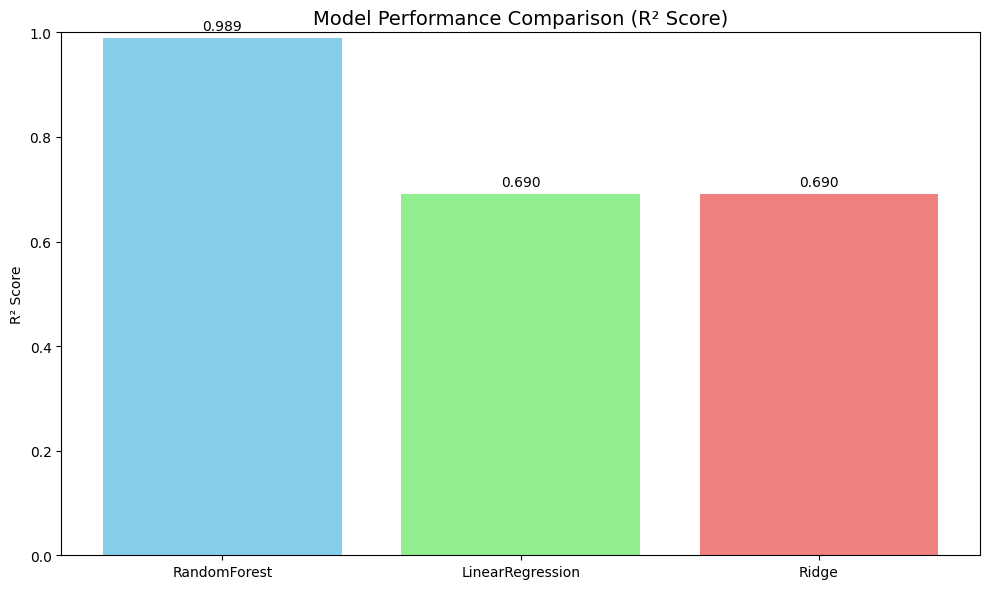

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=2)
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)


rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"✅ RandomForest - R2: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"✅ LinearRegression - R2: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"✅ Ridge - R2: {r2_ridge:.4f}, RMSE: {rmse_ridge:.2f}")

results = {
    'RandomForest': {'R2': r2_rf, 'RMSE': rmse_rf, 'MAE': mae_rf},
    'LinearRegression': {'R2': r2_lr, 'RMSE': rmse_lr, 'MAE': mae_lr},
    'Ridge': {'R2': r2_ridge, 'RMSE': rmse_ridge, 'MAE': mae_ridge}
}
trained_models = {
    'RandomForest': rf_model,
    'LinearRegression': lr_model,
    'Ridge': ridge_model
}

print("Training completed!")

models = list(results.keys())
r2_scores = [results[model]['R2'] for model in models]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison (R² Score)', fontsize=14)
plt.ylabel('R² Score')
plt.ylim(0, 1)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
import joblib

best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
best_model = trained_models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")
print(f"RMSE: ${results[best_model_name]['RMSE']:,.2f}")
print(f"MAE: ${results[best_model_name]['MAE']:,.2f}")

# Save the best model, scaler and the list of training columns
joblib.dump(best_model, 'salary_model.pkl')
joblib.dump(scaler, 'salary_scaler.pkl')
joblib.dump(X.columns.tolist(), 'training_columns.pkl')
print("Model, scaler, and training columns saved!")


🏆 BEST MODEL: RandomForest
R² Score: 0.9894
RMSE: $2,680.66
MAE: $1,142.47
Model, scaler, and training columns saved!


In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib
import os

st.set_page_config(page_title="Employee Salary Prediction App", layout="wide")

st.title("Salary Prediction Web App")
st.markdown("Enter the employee details below to get a salary prediction.")

# Load pre-trained model, scaler and training columns
try:
    model = joblib.load('salary_model.pkl')
    scaler = joblib.load('salary_scaler.pkl')
    training_columns = joblib.load('training_columns.pkl')
    st.success("Pre-trained model, scaler and training columns loaded successfully!")
except FileNotFoundError:
    st.error("⚠️ Model, scaler or training columns file not found.")
    st.stop()
try:

    file_path = '/content/drive/MyDrive/dataset.csv'
    column_names = ['Employee_ID', 'Age', 'Salary', 'Gender', 'Department', 'Experience', 'Education',
                    'Performance_Score', 'Working_Hours', 'City', 'Country', 'Years_in_Company',
                    'Previous_Company', 'Annual_Bonus', 'Join_Date', 'Name']
    original_data = pd.read_csv(file_path, header=None, names=column_names)
    st.success("Original dataset loaded successfully to extract categorical values.")
except FileNotFoundError:
    st.warning("⚠️ Original dataset not found at the expected path. Using placeholder values for categorical features.")
    original_data = None

if original_data is not None:
    all_departments = sorted(original_data['Department'].unique())
    all_education = sorted(original_data['Education'].astype(str).str.replace("'", "").str.strip().unique())
    all_performance_scores = ['Poor (1-2 GPA)', 'Fair (2-3 GPA)', 'Good (3-4 GPA)', 'Excellent (4-5 GPA)']
    all_countries = sorted(original_data['Country'].unique())
    all_previous_companies = sorted(original_data['Previous_Company'].astype(str).str.replace("'", "").str.strip().unique())
    all_cities = sorted(original_data['City'].astype(str).str.replace("'", "").str.strip().unique()) # Get all cities and remove quotes
else:

    all_departments = ['Engineering', 'Sales', 'Marketing', 'HR', 'Finance']
    all_education = ['High School', 'Bachelor', 'Master', 'PhD']
    all_performance_scores = ['Poor (1-2 GPA)', 'Fair (2-3 GPA)', 'Good (3-4 GPA)', 'Excellent (4-5 GPA)']
    all_countries = ['USA', 'Canada', 'UK', 'Germany']
    all_previous_companies = ['TechCorp', 'DataInc', 'SoftwareLtd', 'None']
    all_cities = ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Toronto', 'Vancouver', 'London', 'Manchester', 'Berlin', 'Munich']


# Prediction form
st.subheader("Predict Salary for New Employee")
with st.form("prediction_form"):
    st.write("Enter employee details:")
    col1, col2 = st.columns(2)
    with col1:
        age = st.number_input("Age", min_value=18, max_value=70, value=30)
        gender = st.selectbox("Gender", ['Male', 'Female'])
        department = st.selectbox("Department", all_departments)
        experience = st.number_input("Experience (years)", min_value=0, max_value=40, value=5)
        education = st.selectbox("Education", all_education)
        performance_score_display = st.selectbox("Performance Score", all_performance_scores)
    with col2:
        working_hours = st.number_input("Working Hours per Week", min_value=35, max_value=55, value=40)

        selected_country = st.selectbox("Country", all_countries)
        city = st.selectbox("City", all_cities)

        years_in_company = st.number_input("Years in Company", min_value=0, max_value=20, value=2)
        previous_company = st.selectbox("Previous Company", all_previous_companies)
        annual_bonus = st.number_input("Annual Bonus ($)", min_value=0, max_value=20000, value=5000)

    submitted = st.form_submit_button("Predict Salary")

if submitted:
    # Map display performance score to the original value for prediction
    perf_map_app = {'Poor (1-2 GPA)': 'Poor', 'Fair (2-3 GPA)': 'Fair', 'Good (3-4 GPA)': 'Good', 'Excellent (4-5 GPA)': 'Excellent'}
    performance_score = perf_map_app[performance_score_display]


    new_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Department': [department],
        'Experience': [experience],
        'Education': [education],
        'Performance_Score': [performance_score],
        'Working_Hours': [working_hours],
        'City': [city],
        'Country': [selected_country],
        'Years_in_Company': [years_in_company],
        'Previous_Company': [previous_company],
        'Annual_Bonus': [annual_bonus]
    })

    epsilon = 1e-6
    new_data['Experience_Age_Ratio'] = new_data['Experience'] / (new_data['Age'] + epsilon)

    estimated_average_salary = 75000
    new_data['Bonus_Salary_Ratio'] = new_data['Annual_Bonus'] / (estimated_average_salary + epsilon)

    # Add Performance_Numeric column
    perf_map_numeric = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
    new_data['Performance_Numeric'] = new_data['Performance_Score'].map(perf_map_numeric).fillna(2)


    categorical_cols = ['Gender', 'Department', 'Education', 'Performance_Score', 'City', 'Country', 'Previous_Company']
    for col in categorical_cols:
        if col in new_data.columns:
            le = LabelEncoder()
            if original_data is not None and col in original_data.columns:
                if original_data[col].dtype == 'object':
                     original_unique = original_data[col].astype(str).str.replace("'", "").str.strip().unique()
                else:
                     original_unique = original_data[col].unique()

                new_data[col] = new_data[col].astype(str).str.replace("'", "").str.strip()


                all_unique_values = np.unique(np.concatenate((original_unique, new_data[col].unique())))
                le.fit(all_unique_values)
            else:
                 le.fit(new_data[col].unique())

            new_data[col] = le.transform(new_data[col].astype(str))


    # Ensure the order of columns in new_data matches the training data
    try:
        new_data = new_data[training_columns]
        new_data_scaled = scaler.transform(new_data)
        st.success("Data scaled successfully.")

    except KeyError as e:
        st.error(f"Error: Missing column in input data: {e}. Please ensure all required features are provided.")
        st.stop()
    except Exception as e:
        st.error(f"Error during scaling: {e}")
        st.stop()

    try:
        prediction = model.predict(new_data_scaled)
        st.success(f"Predicted Salary: ${prediction[0]:,.2f}")

        # Prepare data for download
        predicted_data = new_data.copy()
        predicted_data['Predicted_Salary'] = prediction[0]

        col3, col4 = st.columns(2)
        with col3:
            csv_data = predicted_data.to_csv(index=False).encode('utf-8')
            st.download_button(
                label="Download as CSV",
                data=csv_data,
                file_name='salary_prediction.csv',
                mime='text/csv',
            )
        with col4:
            json_data = predicted_data.to_json(orient='records', lines=True).encode('utf-8')
            st.download_button(
                label="Download as JSON",
                data=json_data,
                file_name='salary_prediction.json',
                mime='application/json',
            )

    except Exception as e:
        st.error(f"Error during prediction: {e}")

Overwriting app.py


In [17]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [18]:
!ngrok config add-authtoken ##########################################

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run_streamlit)
thread.start()

from pyngrok import ngrok
import time

# Wait a few seconds to make sure Streamlit started
time.sleep(5)

# Create a tunnel to the Streamlit port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)


Your Streamlit app is live here: NgrokTunnel: "https://278b5a471075.ngrok-free.app" -> "http://localhost:8501"


In [20]:
# !kill $(pgrep ngrok)